# Data Analysis and Machine Learning with Redfin Data

In [156]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

import plotly.express as px

In [157]:
df = pd.read_csv('redfin_data.csv')
df.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8_HREF,Col9_HREF,Col10_SRC,Col11_SRC
0,NaN,NaN,"$1,280,000",3 beds,2.5 baths,"1,280 sq. ft.","1653 Albatross Dr, Sunnyvale, CA 94087","1653 Albatross Dr, Sunnyvale, CA 94087",https://www.redfin.com/CA/Sunnyvale/1653-Albat...,https://www.redfin.com/CA/Sunnyvale/1653-Albat...,https://ssl.cdn-redfin.com/system_files/media/...,https://ssl.cdn-redfin.com/system_files/media/...
1,NaN,NaN,"$1,199,000",3 beds,2.5 baths,"1,354 sq. ft.","6613 Folklore Ct, San Jose, CA 95120","6613 Folklore Ct, San Jose, CA 95120",https://www.redfin.com/CA/San-Jose/6613-Folklo...,https://www.redfin.com/CA/San-Jose/6613-Folklo...,https://ssl.cdn-redfin.com/system_files/media/...,https://ssl.cdn-redfin.com/system_files/media/...
2,NaN,NaN,"$538,888",1 bed,1 bath,953 sq. ft.,"2223 Summereve Ct, San Jose, CA 95122","2223 Summereve Ct, San Jose, CA 95122",https://www.redfin.com/CA/San-Jose/2223-Summer...,https://www.redfin.com/CA/San-Jose/2223-Summer...,https://ssl.cdn-redfin.com/photo/8/islphoto/41...,https://ssl.cdn-redfin.com/photo/8/islphoto/41...
3,NaN,NaN,"$875,000",2 beds,2 baths,"1,285 sq. ft.","400 Deer Valley Rd Unit 2N, San Rafael, CA 94903","400 Deer Valley Rd Unit 2N, San Rafael, CA 94903",https://www.redfin.com/CA/San-Rafael/400-Deer-...,https://www.redfin.com/CA/San-Rafael/400-Deer-...,https://ssl.cdn-redfin.com/photo/27/islphoto/0...,https://ssl.cdn-redfin.com/photo/27/islphoto/0...
4,NaN,NaN,"$475,000",—beds,—baths,19.70 acres (lot),"35005 Loma Chiquita Rd, Los Gatos, CA 95033","35005 Loma Chiquita Rd, Los Gatos, CA 95033",https://www.redfin.com/CA/Los-Gatos/35005-Loma...,https://www.redfin.com/CA/Los-Gatos/35005-Loma...,https://ssl.cdn-redfin.com/photo/8/islphoto/41...,https://ssl.cdn-redfin.com/photo/8/islphoto/41...


In [158]:
# shape of df
df.shape

(2588, 12)

#### Data Cleaning

In [159]:
# view available columns
list(df.columns)

['Col0',
 'Col1',
 'Col2',
 'Col3',
 'Col4',
 'Col5',
 'Col6',
 'Col7',
 'Col8_HREF',
 'Col9_HREF',
 'Col10_SRC',
 'Col11_SRC']

In [160]:
# drop unnecessary columns
df = df.drop([
    'Col0', 
    'Col1',
    'Col7',
    'Col8_HREF',
    'Col9_HREF',
    'Col10_SRC',
    'Col11_SRC'
    ], axis=1)

list(df.columns)

['Col2', 'Col3', 'Col4', 'Col5', 'Col6']

In [161]:
# rename columns appropriately
df.rename(columns={
    'Col2': 'price',
    'Col3': 'bedrooms',
    'Col4': 'bathrooms',
    'Col5': 'size',
    'Col6': 'address',
    }, inplace=True)

list(df.columns)

['price', 'bedrooms', 'bathrooms', 'size', 'address']

In [162]:
# preview dataset
df.head()

,price,bedrooms,bathrooms,size,address
0,"$1,280,000",3 beds,2.5 baths,"1,280 sq. ft.","1653 Albatross Dr, Sunnyvale, CA 94087"
1,"$1,199,000",3 beds,2.5 baths,"1,354 sq. ft.","6613 Folklore Ct, San Jose, CA 95120"
2,"$538,888",1 bed,1 bath,953 sq. ft.,"2223 Summereve Ct, San Jose, CA 95122"
3,"$875,000",2 beds,2 baths,"1,285 sq. ft.","400 Deer Valley Rd Unit 2N, San Rafael, CA 94903"
4,"$475,000",—beds,—baths,19.70 acres (lot),"35005 Loma Chiquita Rd, Los Gatos, CA 95033"


In [163]:
# remove house whose 'size' column does not contain the string sq.ft
df = df[(df['size'].str.contains('sq. ft', na=False))]
df.head()

,price,bedrooms,bathrooms,size,address
0,"$1,280,000",3 beds,2.5 baths,"1,280 sq. ft.","1653 Albatross Dr, Sunnyvale, CA 94087"
1,"$1,199,000",3 beds,2.5 baths,"1,354 sq. ft.","6613 Folklore Ct, San Jose, CA 95120"
2,"$538,888",1 bed,1 bath,953 sq. ft.,"2223 Summereve Ct, San Jose, CA 95122"
3,"$875,000",2 beds,2 baths,"1,285 sq. ft.","400 Deer Valley Rd Unit 2N, San Rafael, CA 94903"
5,"$995,000",2 beds,1.5 baths,"1,229 sq. ft.","17897 Mozelle Ct, Los Gatos, CA 95033"


In [164]:
# Extract numbers using regular expression and replace non-numeric values with NaN
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(int)

df['bedrooms'] = df['bedrooms'].str.extract('(\d+)').astype(float)

df['bathrooms'] = df['bathrooms'].str.extract('([\d.]+)').astype(float)

df['size'] = df['size'].str.replace('[,]', '', regex=True).str.extract('(\d+)').astype(float)

df['address'] = df['address'].astype('category')

# preview dataset
df.head()

,price,bedrooms,bathrooms,size,address
0,1280000,3.0,2.5,1280.0,"1653 Albatross Dr, Sunnyvale, CA 94087"
1,1199000,3.0,2.5,1354.0,"6613 Folklore Ct, San Jose, CA 95120"
2,538888,1.0,1.0,953.0,"2223 Summereve Ct, San Jose, CA 95122"
3,875000,2.0,2.0,1285.0,"400 Deer Valley Rd Unit 2N, San Rafael, CA 94903"
5,995000,2.0,1.5,1229.0,"17897 Mozelle Ct, Los Gatos, CA 95033"


In [165]:
# drop null values
df.dropna(inplace=True)

# convert to int
df['bedrooms'] = df['bedrooms'].astype(int)

df['size'] = df['size'].astype(int)

# preview dataset
df.head()

,price,bedrooms,bathrooms,size,address
0,1280000,3,2.5,1280,"1653 Albatross Dr, Sunnyvale, CA 94087"
1,1199000,3,2.5,1354,"6613 Folklore Ct, San Jose, CA 95120"
2,538888,1,1.0,953,"2223 Summereve Ct, San Jose, CA 95122"
3,875000,2,2.0,1285,"400 Deer Valley Rd Unit 2N, San Rafael, CA 94903"
5,995000,2,1.5,1229,"17897 Mozelle Ct, Los Gatos, CA 95033"


In [166]:
# check final shape
df.shape

(2502, 5)

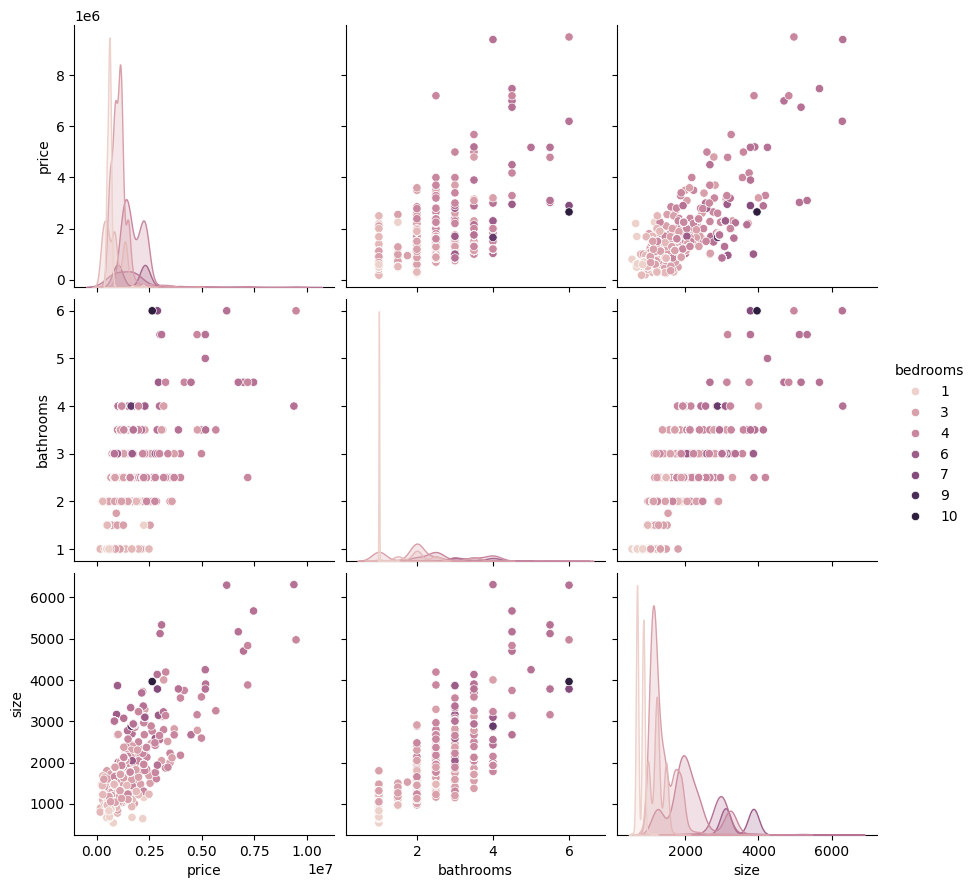

In [167]:
sns.pairplot(df, hue="bedrooms", height=3)

The scatterplots in the pair plot reveal upward-sloping patterns as the number of bedrooms increases, indicating higher prices.  
The correlation heatmap shows a positive correlation coefficient between 'bedrooms' and 'price.'


In [168]:
# drop unnecessary columns
df = df.drop([
    'address', 
    ], axis=1)

list(df.columns)

['price', 'bedrooms', 'bathrooms', 'size']

How does the number of bedrooms influence property prices in the San Francisco Bay Area?

##### What features exhibit the strongest correlation with property prices in the San Francisco Bay Area?

Text(0.5, 1.0, 'Correlation Heatmap')

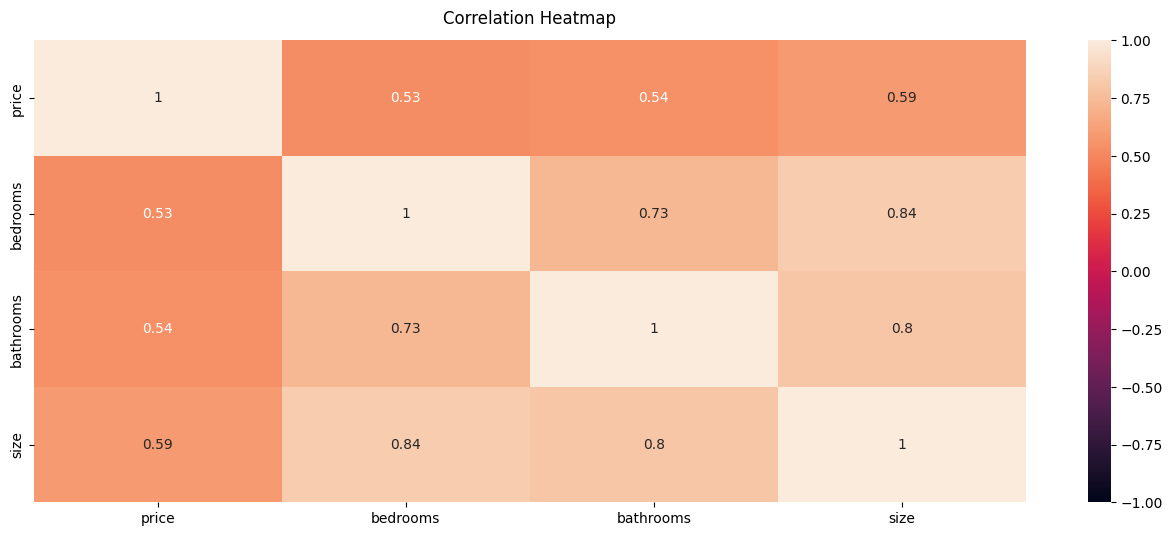

In [169]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [170]:
# get correlation
df.corr()

,price,bedrooms,bathrooms,size
price,1.000000,0.525854,0.539614,0.592369
bedrooms,0.525854,1.000000,0.727493,0.835732
bathrooms,0.539614,0.727493,1.000000,0.799594
size,0.592369,0.835732,0.799594,1.000000


The heatmap displays the strength and direction of correlations between various features and property prices.  
Features with high positive correlations may have a more substantial impact on property prices.


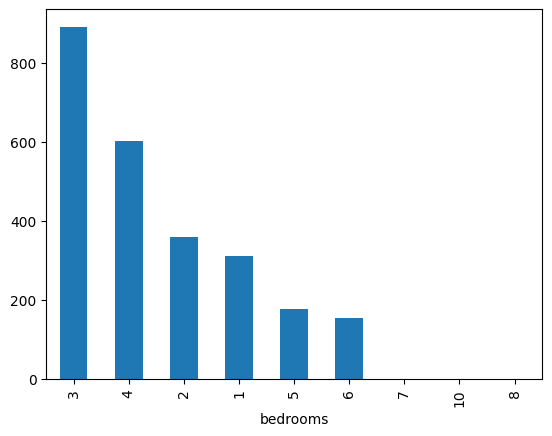

In [171]:
# check value counts for each feature
df['bedrooms'].value_counts().plot.bar()

plt.show()

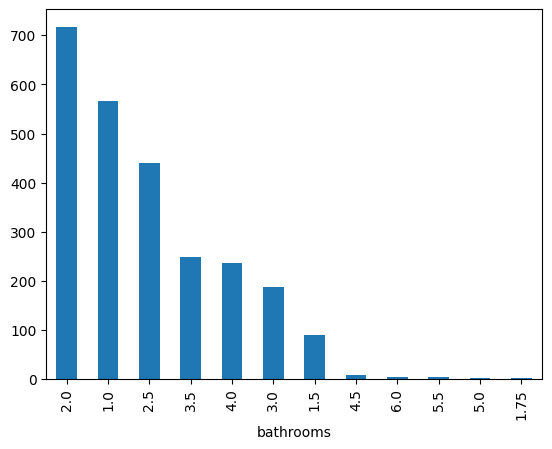

In [172]:
df['bathrooms'].value_counts().plot.bar()

plt.show()

<Axes: >

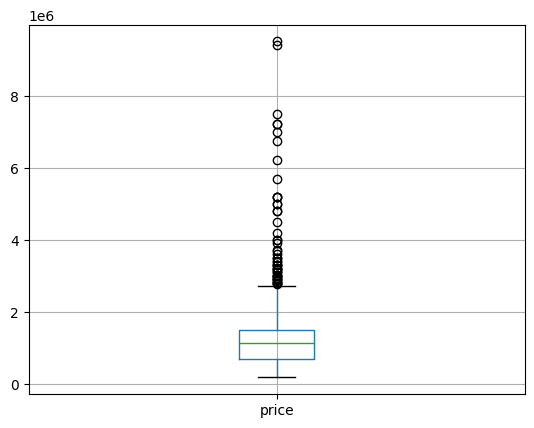

In [173]:
df.boxplot(column=['price'])  

In [174]:
y = df[['price']]
x = df.drop('price', axis=1)

In [175]:
linearregression =  LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
linearregression.fit(X_train,y_train)
y_pred = linearregression.predict(X_test)

In [176]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.25007074106521965

In [177]:
X_train,X_test,y_train,y_test=train_test_split(x['size'].values.reshape(-1, 1),y,test_size=0.2,random_state=0)
linearregression.fit(X_train,y_train)
y_pred = linearregression.predict(X_test)

##### How does the size (square footage) of a property affect its price in the San Francisco Bay Area?


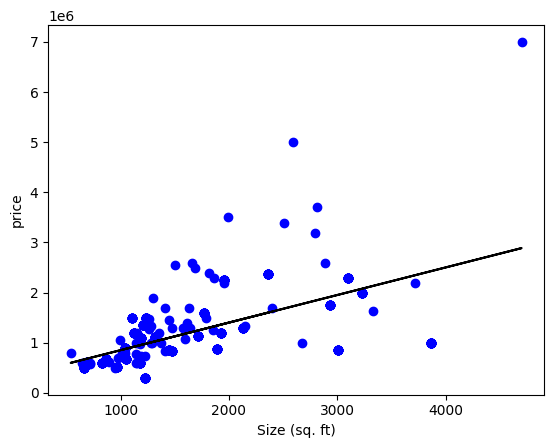

In [178]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel('Size (sq. ft)')
plt.ylabel("price")
plt.show()

The regression analysis revealed that there is a statistically significant relationship between property size and price.  
For every increase in square footage, property prices tend to increase by a certain amount.


In [179]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.2135717235970882

##### Can we classify the number of bedrooms in properties based on price and size?


0.21357172359708843


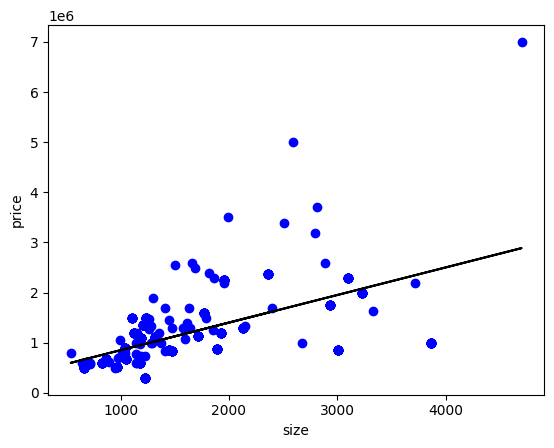

In [180]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("regression", LinearRegression())]


X = np.array(df['size']).reshape(-1, 1)
y = np.array(df['price']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
    

print(pipeline.score(X_test, y_test))
y_pred = pipeline.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("size")
plt.ylabel("price")
plt.show()

In [181]:
r2 = metrics.r2_score(y_test, y_pred)
print("score:", pipeline.score(X_test, y_test))

print('R^2:', r2)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score: 0.21357172359708843
R^2: 0.21357172359708843
MAE: 415791.4494169041
MSE: 357867113592.7943
RMSE: 598219.954191428


In [182]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("regression", LinearRegression())]


X = df.drop('price', axis=1)
y = np.array(df['price']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0 )

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
    

print(pipeline.score(X_test, y_test))

    
r2 = metrics.r2_score(y_test, y_pred)
print("score:", pipeline.score(X_test, y_test))

print('R^2:', r2)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.2500707410651988
score: 0.2500707410651988
R^2: 0.21357172359708843
MAE: 415791.4494169041
MSE: 357867113592.7943
RMSE: 598219.954191428


In [183]:
# with scaling
X = df[['price','size']] # Features
y = df['bedrooms'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
y.value_counts()

bedrooms
3     892
4     603
2     361
1     311
5     178
6     154
7       1
10      1
8       1
Name: count, dtype: int64

In [184]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.741


In [185]:
X = df[['price','size']] # Features
y = df['bedrooms'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
y.value_counts()

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
max = 0 
k = 0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

for i in range(1,15):

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    if max < acc:
        k = i
        max = acc
    

print(f"Accuracy = {acc*100:.2f}%, K = {k}")

Accuracy = 92.81%, K = 6


The KNN model demonstrated a high accuracy score in classifying properties into their respective bedroom categories.  
This suggests that property size and price can effectively predict the number of bedrooms.


In [186]:
# export the dataframe
df.to_csv('cleaned_redfin_data.csv')